In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import joblib


In [2]:
Table1 = pd.read_csv(r"C:\Users\User\Desktop\Tables\Table1.csv")
Table1

,Sl_No,Brand_Name,Category,Product_Type,Product_Name,Product_Code,Price
0,1,Stop,Kids,Tops,206955264_MINT,206955264,1254
1,2,Intune,Kids,Cotton,A Day at the Beach Cotton T-shirt for Boys,S23K-JBTSHK041,8990
2,3,Life,Women,Cotton Stretch,A Line Above Knee Denim Women's Casual Wear Sk...,A22507DENSAND14,3456
3,4,Life,Kids,Half Sleeves,A20711GTEE204_PEACH,A20711GTEE204,8937
4,5,Stop,Kids,Tops,A22710DSNGTEE03_PINK,A22710DSNGTEE03,8937
...,...,...,...,...,...,...,...
5184,5185,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB13730,34999
5185,5186,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14680,34999
5186,5187,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14690,34999
5187,5188,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB9880,34999


In [3]:
Table1.columns

Index(['Sl_No', 'Brand_Name', 'Category', 'Product_Type', 'Product_Name',
       'Product_Code', 'Price'],
      dtype='object')

In [4]:
Table2 = pd.read_csv(r"C:\Users\User\Desktop\Tables\Table2.csv")
Table2

,Sl_No,Color,Wear_Type,Material_Type,Reviews
0,1,MINT,Top Wear,Cotton,0
1,2,WHITE,Top Wear,Cotton,0
2,3,MID,Top Wear,Denim,0
3,4,PEACH,Top Wear,Cotton,0
4,5,PINK,Top Wear,Cotton,0
...,...,...,...,...,...
5184,5185,Olive Strata,Top Wear,Polyester,12
5185,5186,Olive Strata,Top Wear,Polyester,12
5186,5187,Olive Strata,Top Wear,Polyester,12
5187,5188,Olive Strata,Top Wear,Polyester,12


In [5]:
Table2.columns

Index(['Sl_No', 'Color', 'Wear_Type', 'Material_Type', 'Reviews'], dtype='object')

In [6]:
Table3 = pd.read_csv(r"C:\Users\User\Desktop\Tables\Table3.csv")
Table3

,Sl_No,Size_1,Size_2,Size_3,Size_4,Country_Of_Origin,ReturnTime,Occasion
0,1,7-8Y,-,2-3Y,3-4Y,India,14,Casual
1,2,2-3 Y,3-4 Y,5-6 Y,7-8 Y,India,14,Casual
2,3,30,28,28,32,India,0,Casual
3,4,9-10Y,-,11-12Y,13-14Y,India,0,Casual
4,5,7-8 Y,-,2-3 Y,3-4 Y,India,0,Casual
...,...,...,...,...,...,...,...,...
5184,5185,-,-,-,-,India,14,Sportswear
5185,5186,-,-,-,-,India,14,Sportswear
5186,5187,-,-,-,-,India,14,Sportswear
5187,5188,-,-,-,-,India,14,Sportswear


In [7]:
Table3.columns

Index(['Sl_No', 'Size_1', 'Size_2', 'Size_3', 'Size_4', 'Country_Of_Origin',
       'ReturnTime', 'Occasion'],
      dtype='object')

In [8]:
merged_table = pd.merge(Table1, Table2, on='Sl_No')
merged_table

,Sl_No,Brand_Name,Category,Product_Type,Product_Name,Product_Code,Price,Color,Wear_Type,Material_Type,Reviews
0,1,Stop,Kids,Tops,206955264_MINT,206955264,1254,MINT,Top Wear,Cotton,0
1,2,Intune,Kids,Cotton,A Day at the Beach Cotton T-shirt for Boys,S23K-JBTSHK041,8990,WHITE,Top Wear,Cotton,0
2,3,Life,Women,Cotton Stretch,A Line Above Knee Denim Women's Casual Wear Sk...,A22507DENSAND14,3456,MID,Top Wear,Denim,0
3,4,Life,Kids,Half Sleeves,A20711GTEE204_PEACH,A20711GTEE204,8937,PEACH,Top Wear,Cotton,0
4,5,Stop,Kids,Tops,A22710DSNGTEE03_PINK,A22710DSNGTEE03,8937,PINK,Top Wear,Cotton,0
...,...,...,...,...,...,...,...,...,...,...,...
5184,5185,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB13730,34999,Olive Strata,Top Wear,Polyester,12
5185,5186,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14680,34999,Olive Strata,Top Wear,Polyester,12
5186,5187,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14690,34999,Olive Strata,Top Wear,Polyester,12
5187,5188,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB9880,34999,Olive Strata,Top Wear,Polyester,12


In [9]:
final_table = pd.merge(merged_table, Table3, on='Sl_No')
final_table

,Sl_No,Brand_Name,Category,Product_Type,Product_Name,Product_Code,Price,Color,Wear_Type,Material_Type,Reviews,Size_1,Size_2,Size_3,Size_4,Country_Of_Origin,ReturnTime,Occasion
0,1,Stop,Kids,Tops,206955264_MINT,206955264,1254,MINT,Top Wear,Cotton,0,7-8Y,-,2-3Y,3-4Y,India,14,Casual
1,2,Intune,Kids,Cotton,A Day at the Beach Cotton T-shirt for Boys,S23K-JBTSHK041,8990,WHITE,Top Wear,Cotton,0,2-3 Y,3-4 Y,5-6 Y,7-8 Y,India,14,Casual
2,3,Life,Women,Cotton Stretch,A Line Above Knee Denim Women's Casual Wear Sk...,A22507DENSAND14,3456,MID,Top Wear,Denim,0,30,28,28,32,India,0,Casual
3,4,Life,Kids,Half Sleeves,A20711GTEE204_PEACH,A20711GTEE204,8937,PEACH,Top Wear,Cotton,0,9-10Y,-,11-12Y,13-14Y,India,0,Casual
4,5,Stop,Kids,Tops,A22710DSNGTEE03_PINK,A22710DSNGTEE03,8937,PINK,Top Wear,Cotton,0,7-8 Y,-,2-3 Y,3-4 Y,India,0,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,5185,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB13730,34999,Olive Strata,Top Wear,Polyester,12,-,-,-,-,India,14,Sportswear
5185,5186,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14680,34999,Olive Strata,Top Wear,Polyester,12,-,-,-,-,India,14,Sportswear
5186,5187,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB14690,34999,Olive Strata,Top Wear,Polyester,12,-,-,-,-,India,14,Sportswear
5187,5188,Adidas,Men,Top,Y-3 REAL MADRID ANTHEM JACKET,HB9880,34999,Olive Strata,Top Wear,Polyester,12,-,-,-,-,India,14,Sportswear


In [10]:
print(final_table.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5188
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sl_No              5189 non-null   int64 
 1   Brand_Name         5189 non-null   object
 2   Category           5189 non-null   object
 3   Product_Type       5189 non-null   object
 4   Product_Name       5189 non-null   object
 5   Product_Code       5189 non-null   object
 6   Price              5189 non-null   int64 
 7   Color              5189 non-null   object
 8   Wear_Type          5189 non-null   object
 9   Material_Type      5189 non-null   object
 10  Reviews            5189 non-null   int64 
 11  Size_1             5101 non-null   object
 12  Size_2             5101 non-null   object
 13  Size_3             5102 non-null   object
 14  Size_4             5103 non-null   object
 15  Country_Of_Origin  5189 non-null   object
 16  ReturnTime         5189 non-null   int64 


The final_table DataFrame contains 5189 entries and 18 columns.

Sl_No: Serial number. Brand_Name: Name of the brand. Category: Category of the product. Product_Type: Type of the product. Product_Name: Name of the product. Product_Code: Code of the product. Price: Price of the product. Color: Color of the product. Wear_Type: Type of wear. Material_Type: Type of material. Reviews: Number of reviews. Size_1: Size category 1. Size_2: Size category 2. Size_3: Size category 3. Size_4: Size category 4. Country_Of_Origin: Country of origin of the product. ReturnTime: Return time of the product. Occasion: Occasion for the product. Here are some observations based on the information provided:

Data Types: The majority of the columns are of object type (string), with a few integer columns (Sl_No, Price, Reviews, and ReturnTime).

Missing Values: Columns Size_1, Size_2, Size_3, and Size_4 have missing values. These columns are related to the size of the products.

Categorical Variables: Several columns such as Brand_Name, Category, Color, Wear_Type, Material_Type, Country_Of_Origin, and Occasion are categorical variables.

In [13]:
# Check for missing values
print(final_table.isnull().sum())

Sl_No                 0
Brand_Name            0
Category              0
Product_Type          0
Product_Name          0
Product_Code          0
Price                 0
Color                 0
Wear_Type             0
Material_Type         0
Reviews               0
Size_1               88
Size_2               88
Size_3               87
Size_4               86
Country_Of_Origin     0
ReturnTime            0
Occasion              0
dtype: int64


In [14]:
# Fill missing values in Size columns
final_table[['Size_1', 'Size_2', 'Size_3', 'Size_4']] = final_table[['Size_1', 'Size_2', 'Size_3', 'Size_4']].fillna('-')


In [72]:
# Check for duplicates
print("Duplicate Rows in final_table:", final_table.duplicated().sum())

Duplicate Rows in final_table: 0


# Statistics

In [73]:
print("Statistics for final_table:")
print(final_table.describe())

Statistics for final_table:
             Sl_No         Price      Reviews   ReturnTime
count  5189.000000   5189.000000  5189.000000  5189.000000
mean   2595.000000   3559.084987     9.258624     8.871073
std    1498.079604   6253.011232    14.589466     4.342168
min       1.000000    179.000000     0.000000     0.000000
25%    1298.000000    749.000000     0.000000     7.000000
50%    2595.000000   1349.000000    10.000000     7.000000
75%    3892.000000   4563.000000    10.000000    14.000000
max    5189.000000  49999.000000   124.000000    14.000000


# Categorical Variables

In [74]:
print("Frequency of Categories in final_table - Category:")
print(final_table['Category'].value_counts())

Frequency of Categories in final_table - Category:
Women     1629
Men       1605
Kids      1544
Unisex     411
Name: Category, dtype: int64


In [75]:
print("\nFrequency of Categories in final_table - Wear_Type:")
print(final_table['Wear_Type'].value_counts())


Frequency of Categories in final_table - Wear_Type:
Top Wear       3000
Bottom Wear    1814
Indian Wear     200
Top wear        175
Name: Wear_Type, dtype: int64


In [76]:
final_table['Wear_Type'] = final_table['Wear_Type'].replace('Top wear', 'Top Wear')

In [77]:
print("\nFrequency of Categories in final_table - Wear_Type:")
print(final_table['Wear_Type'].value_counts())


Frequency of Categories in final_table - Wear_Type:
Top Wear       3175
Bottom Wear    1814
Indian Wear     200
Name: Wear_Type, dtype: int64


In [78]:
print("\nFrequency of Categories in final_table - Occasion:")
print(final_table['Occasion'].value_counts())


Frequency of Categories in final_table - Occasion:
Casual         3371
 Sportswear     976
Celebration     741
winter wear      60
 Festive         28
 Fashion          7
Formal Wear       4
Winter Wear       1
Fusion Wear       1
Name: Occasion, dtype: int64


In [79]:
final_table['Occasion'] = final_table['Occasion'].replace('winter wear', 'Winter Wear')

In [80]:
print("\nFrequency of Categories in final_table - Occasion:")
print(final_table['Occasion'].value_counts())


Frequency of Categories in final_table - Occasion:
Casual         3371
 Sportswear     976
Celebration     741
Winter Wear      61
 Festive         28
 Fashion          7
Formal Wear       4
Fusion Wear       1
Name: Occasion, dtype: int64


# Visualization

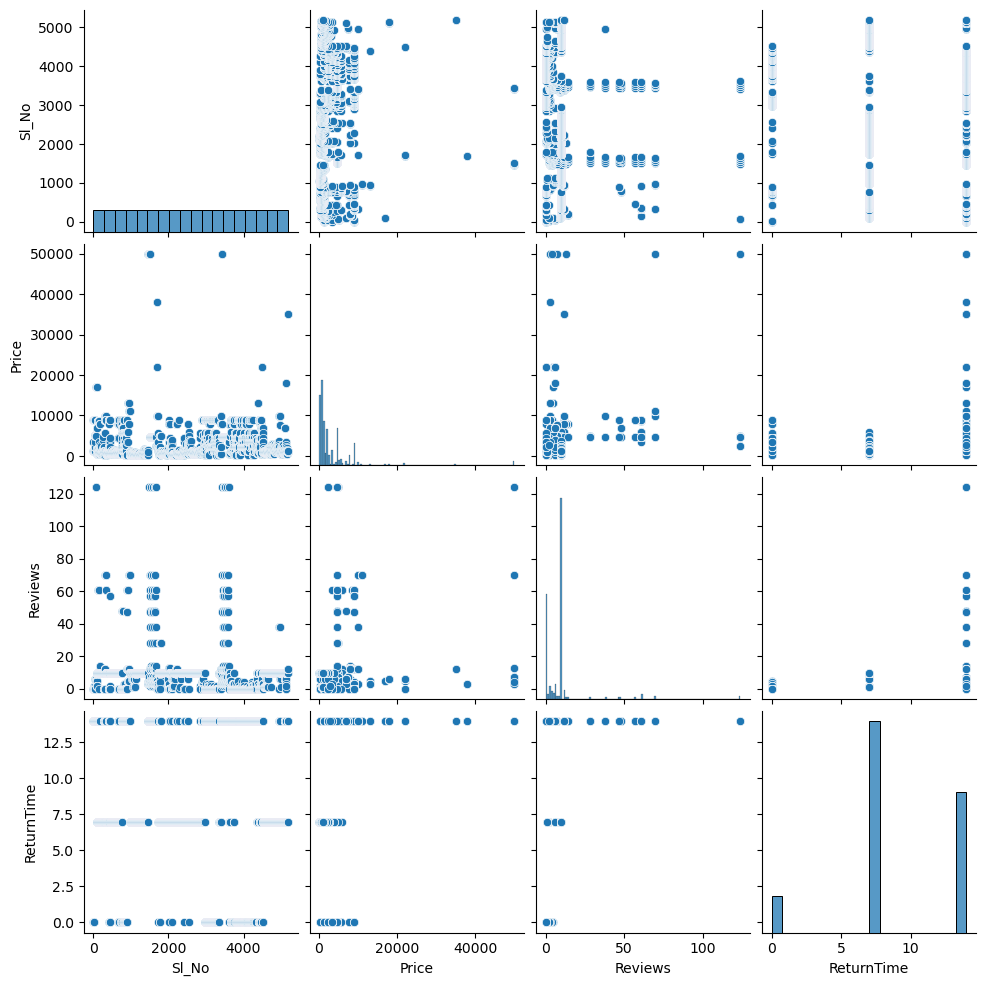

In [81]:
sns.pairplot(final_table)
plt.show()

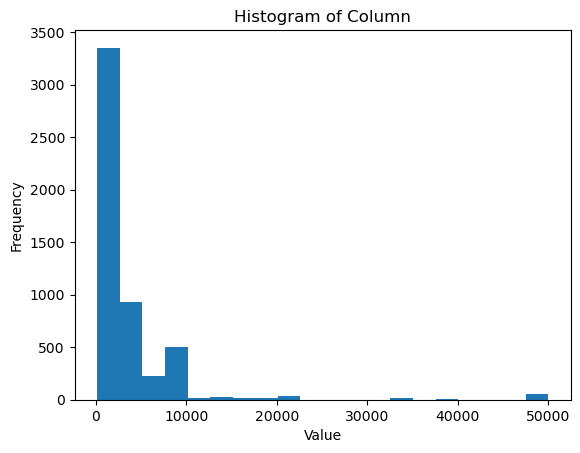

In [82]:
plt.hist(final_table['Price'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

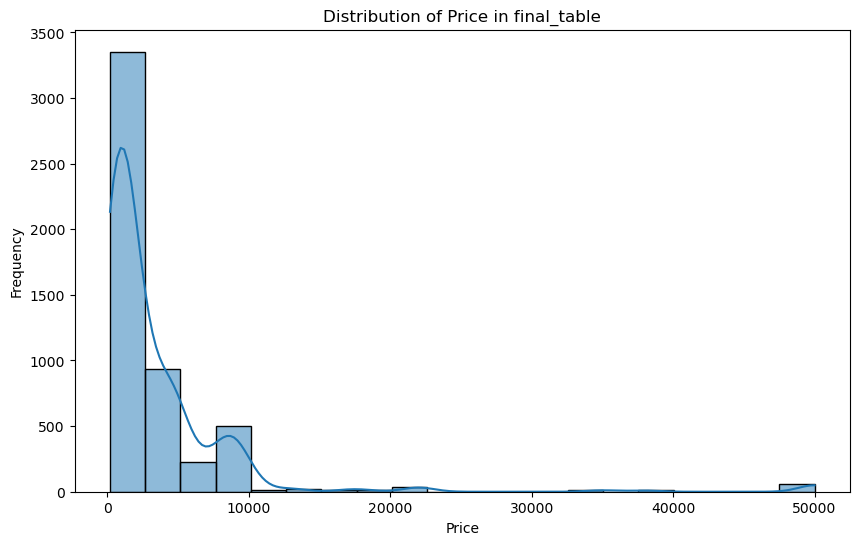

In [83]:
# Histogram of Price in final_table
plt.figure(figsize=(10, 6))
sns.histplot(data=final_table, x='Price', bins=20, kde=True)
plt.title('Distribution of Price in final_table')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

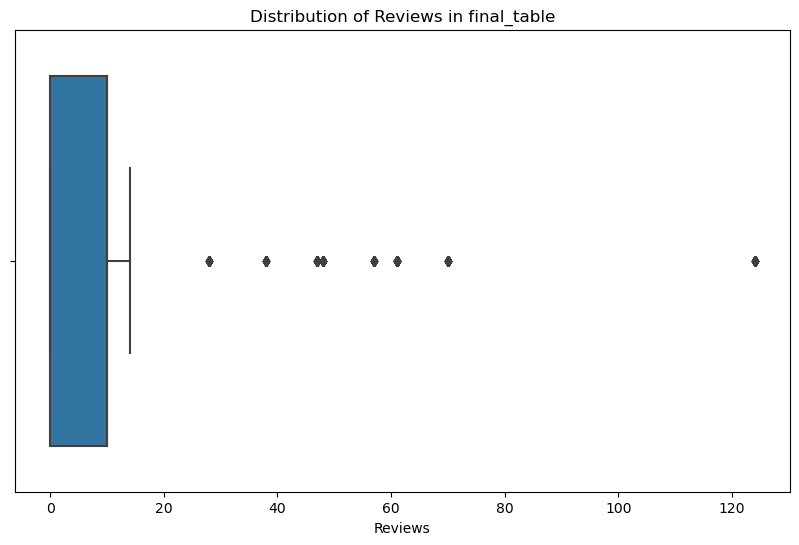

In [86]:
# Box plot of Reviews in final_table
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_table, x='Reviews')
plt.title('Distribution of Reviews in final_table')
plt.xlabel('Reviews')
plt.show()

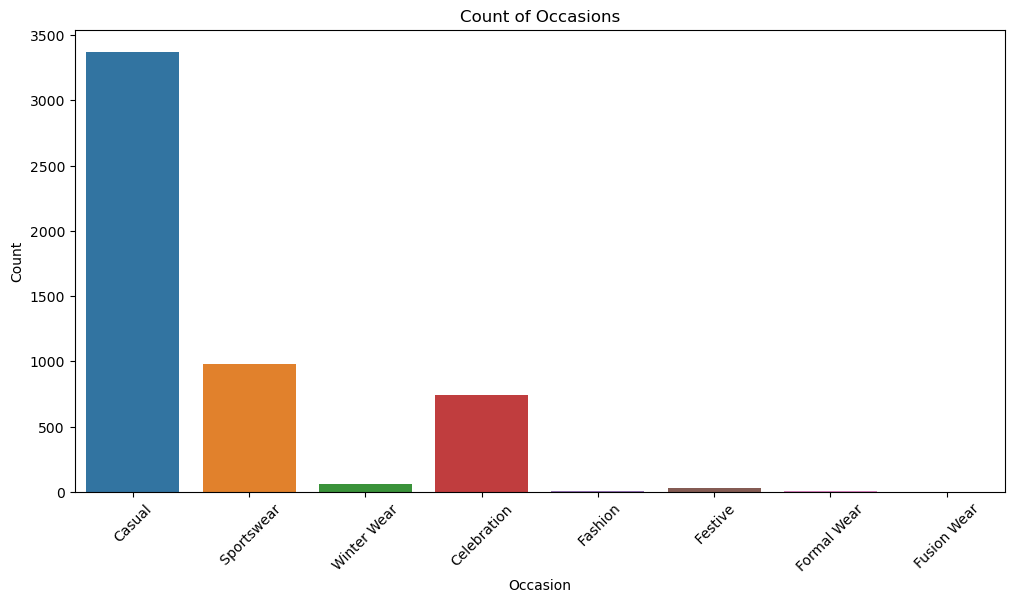

In [87]:
# Scatter plot of ReturnTime vs Sl_No in final_table
plt.figure(figsize=(12, 6))
sns.countplot(data=final_table, x='Occasion')
plt.title('Count of Occasions')
plt.xlabel('Occasion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16312\1244755653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_table.corr()


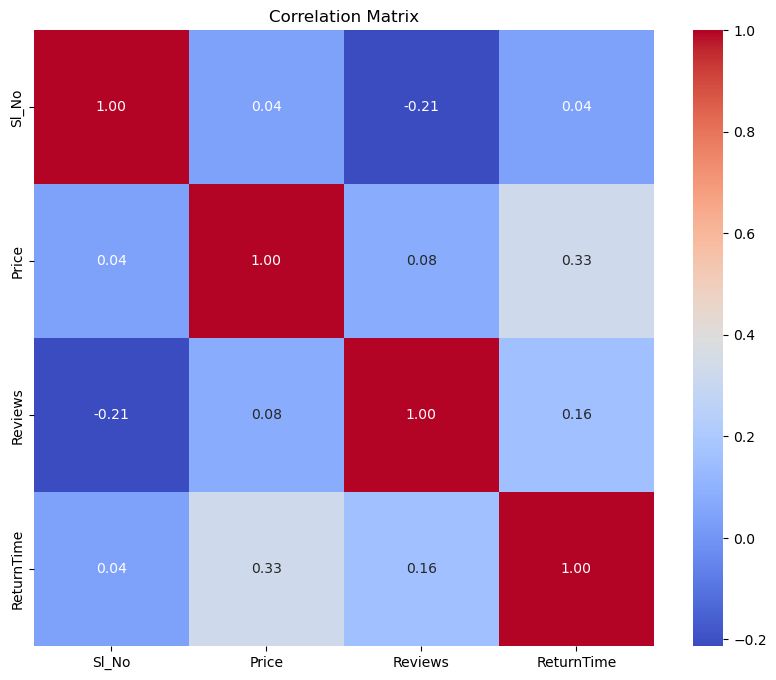

In [88]:
correlation_matrix = final_table.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Phase 4

# Model Buiding

In [31]:
# Data Preparation
X_price = final_table.drop(['Price'], axis=1)  # Features for price prediction
y_price = final_table['Price']  # Target variable for price prediction
X_occasion = final_table.drop(['Occasion'], axis=1)  # Features for occasion prediction
y_occasion = final_table['Occasion']  # Target variable for occasion prediction


In [32]:
# Encode categorical variables
encoder = LabelEncoder()
X_price_encoded = X_price.apply(encoder.fit_transform)
X_occasion_encoded = X_occasion.apply(encoder.fit_transform)

In [33]:
# Split data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price_encoded, y_price, test_size=0.2, random_state=42)
X_train_occasion, X_test_occasion, y_train_occasion, y_test_occasion = train_test_split(X_occasion_encoded, y_occasion, test_size=0.2, random_state=42)


In [35]:
# Define preprocessing steps (scaling numerical features)
numeric_features = X_train_price.select_dtypes(include=['int64']).columns.tolist()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])


# Build and evaluate models

In [43]:
# For price prediction
pipe_price = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor())])

# For occasion prediction
pipe_occasion = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('Random Forest', RandomForestClassifier())])

In [44]:
param_grid_price = {
    'model__n_estimators': [100, 200, 300],  
    'model__max_depth': [None, 10, 20]
}



In [50]:
param_grid_occasion = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20]
}

In [46]:
price_models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor()}


In [47]:
for model_name, model in price_models.items():
    if model_name == 'Random Forest':
        pipe_price = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
        grid_search_price = GridSearchCV(pipe_price, param_grid=param_grid_price, scoring='neg_mean_absolute_error', cv=5)
        grid_search_price.fit(X_train_price, y_train_price)
        y_pred_price = grid_search_price.predict(X_test_price)
        print(f"{model_name}: MAE = {mean_absolute_error(y_test_price, y_pred_price)}")

Random Forest: MAE = 592.6181021194606


In [51]:
 if model_name == 'Random Forest':
        pipe_occasion = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('model', model)])
        grid_search_occasion = GridSearchCV(pipe_occasion, param_grid=param_grid_occasion, scoring='accuracy', cv=5)
        grid_search_occasion.fit(X_train_occasion, y_train_occasion)
        y_pred_occasion = grid_search_occasion.predict(X_test_occasion)
        print(f"{model_name}: Accuracy = {accuracy_score(y_test_occasion, y_pred_occasion)}")

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Accuracy = 0.9210019267822736


In [53]:
# Calculate precision
precision = precision_score(y_test_occasion, y_pred_occasion, average='weighted')


C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Calculate recall
recall = recall_score(y_test_occasion, y_pred_occasion, average='weighted')


In [55]:
# Calculate F1-score
f1 = f1_score(y_test_occasion, y_pred_occasion, average='weighted')


In [56]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_occasion, y_pred_occasion)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.9149099769289688
Recall: 0.9210019267822736
F1-score: 0.9166208142992717
Confusion Matrix:
[[  0   0   0   1   0   0   0   0]
 [  0   2   0   1   1   0   0   0]
 [  0   0 174   4   0   0   0   0]
 [  0   1   0 678  25   0   0   1]
 [  0   1   0  35  98   0   0   0]
 [  0   0   0   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   4   4   0   0   4]]


In [58]:
# Fit the Random Forest model to the training data
model.fit(X_train_occasion, y_train_occasion)

RandomForestClassifier()

In [59]:
# Now you can access the feature importances
feature_importance = model.feature_importances_

In [60]:
# Fit the Random Forest model to the training data
model.fit(X_train_price, y_train_price)

RandomForestClassifier()

In [61]:
# Now you can access the feature importances
feature_importance = model.feature_importances_

In [63]:
# Assuming 'feature_names' contains the names of the features
feature_names = X_train_occasion.columns

In [64]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


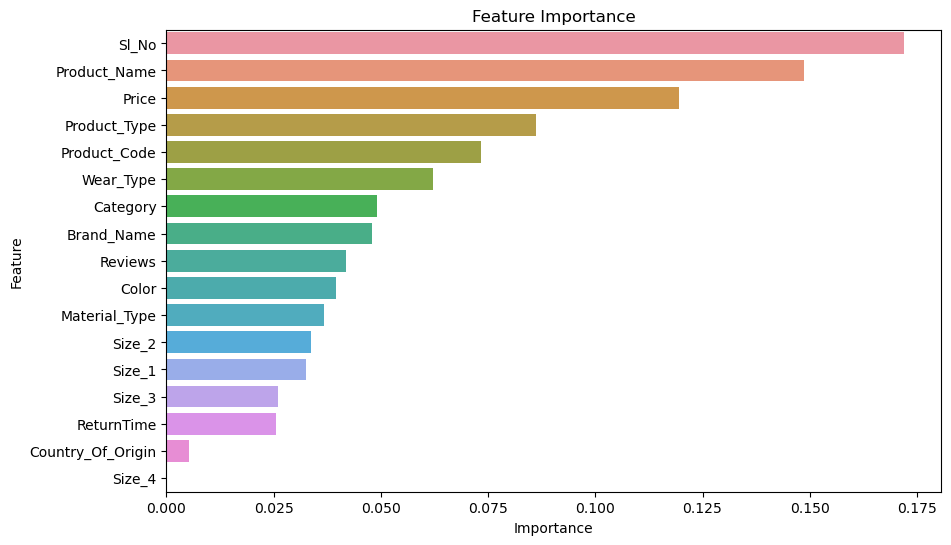

In [65]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [66]:
best_model_price = grid_search_price.best_estimator_
best_model_occasion = grid_search_occasion.best_estimator_

In [68]:
joblib.dump(best_model_price, 'best_model_price.pkl')


['best_model_price.pkl']

In [69]:
joblib.dump(best_model_occasion, 'best_model_occasion.pkl')

['best_model_occasion.pkl']

In [70]:
# Convey the basis for choosing the best models
print("Price Prediction Model:")
print(f"- Chosen based on negative mean absolute error: {grid_search_price.best_score_}")
print(f"- Best hyperparameters: {grid_search_price.best_params_}")


Price Prediction Model:
- Chosen based on negative mean absolute error: -603.7880343197096
- Best hyperparameters: {'model__max_depth': None, 'model__n_estimators': 300}


In [71]:
print("\nOccasion Prediction Model:")
print(f"- Chosen based on accuracy: {grid_search_occasion.best_score_}")
print(f"- Best hyperparameters: {grid_search_occasion.best_params_}")


Occasion Prediction Model:
- Chosen based on accuracy: 0.9176144288344714
- Best hyperparameters: {'model__max_depth': 10, 'model__n_estimators': 300}


best_estimator_ attribute of GridSearchCV returns the best model.
The joblib.dump() function is used to save the best models to files.
The basis for choosing the best models is conveyed using best_score_ attribute of GridSearchCV and the best_params_ attribute to display the best hyperparameters.